In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
a = np.random.normal(10,5,30)
noise = np.random.normal(0,6,30)
b = a * -2.5 + 80 + noise
df = pd.DataFrame({'a':a, 'const':1, 'b':b})
df.head()

,a,const,b
0,13.058953,1,55.342071
1,10.301936,1,61.395103
2,16.544073,1,23.639403
3,18.233726,1,30.320667
4,-0.197526,1,85.356462


(0.0, 88.44231453960941)

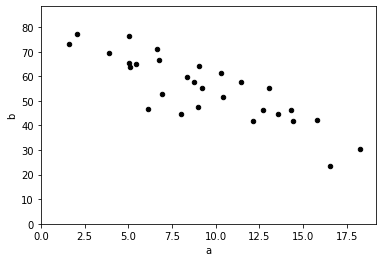

In [11]:
ax = df.plot.scatter(x = 'a', y = 'b', color = 'black')
ax.set_xlim(0)
ax.set_ylim(0)

In [16]:
A = df[['a', 'const']].values
b = df['b'].values.reshape(-1,1)
P = A.dot(np.linalg.inv(A.T.dot(A))).dot(A.T)
df['p'] = P.dot(b)

In [17]:
df.head()

,a,const,b,p
0,13.058953,1,55.342071,45.296757
1,10.301936,1,61.395103,52.676525
2,16.544073,1,23.639403,35.968062
3,18.233726,1,30.320667,31.445332
4,-0.197526,1,85.356462,80.780660


(0.0, 88.44231453960941)

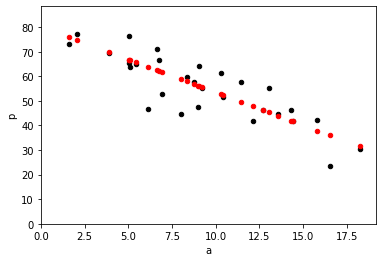

In [20]:
ax = df.plot.scatter(x = 'a', y = 'b', color = 'black')
df.plot.scatter(x = 'a', y = 'p', color = 'red', ax = ax)
ax.set_xlim(0)
ax.set_ylim(0)

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
r = LinearRegression()
r

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
r.fit(df['a'].values.reshape(-1,1), df['b'].values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
dir(r)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_residues',
 '_set_intercept',
 'coef_',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'intercept_',
 'n_jobs',
 'normalize',
 'predict',
 'rank_',
 'score',
 'set_params',
 'singular_']

In [30]:
r.coef_, r.intercept_

(array([[-2.67672157]]), array([80.25193902]))

In [31]:
rows = [['M. Dupé', 1, 25, 'Right', 8.0, 900.0],
       ['N. Fernández', 26, 18, 'Right', 1.0, 450.0],
       ['P. Kalambayi', 30, 18, 'Right', 1.0, 130.0],
       ['P. McNair', 17, 23, 'Right', 22.0, 2300.0],
       ['G. Bojanich', 23, 33, 'Right', 6.0, 425.0],
       ['A. Kofler', 31, 31, 'Right', 3.0, 325.0],
       ['N. Lavanchy', 14, 24, 'Right', 3.0, 600.0],
       ['O. Al Khalaf', 8, 21, 'Right', 3.0, 240.0],
       ['J. Sills', 21, 31, 'Right', 7.0, 600.0],
       ['B. Fox', 12, 20, 'Right', 1.0, 230.0],
       ['S. Smith', 9, 20, 'Left', 4.0, 450.0],
       ['E. Ocansey', 28, 20, 'Left', 5.0, 1600.0],
       ['F. Kostić', 10, 25, 'Left', 16.0, 10500.0],
       ['M. Ullmann', 13, 22, 'Left', 3.0, 1000.0],
       ['R. Taylor', 9, 30, 'Left', 4.0, 625.0],
       ['N. Vikonis', 34, 34, 'Left', 7.0, 2700.0],
       ['J. Aguirre', 29, 21, 'Left', 1.0, 575.0],
       ['J. Konings', 25, 20, 'Left', 1.0, 500.0],
       ['J. Raitala', 22, 29, 'Left', 3.0, 700.0],
       ['A. Taylor', 3, 31, 'Left', 3.0, 425.0]]
df = pd.DataFrame.from_records(rows, columns=["Name", "JerseyNumber", "Age", "PreferredFoot", "Wage", "Value"])
df.dtypes

Name              object
JerseyNumber       int64
Age                int64
PreferredFoot     object
Wage             float64
Value            float64
dtype: object

In [32]:
r = LinearRegression()
columns = ["JerseyNumber", "Age"]
r.fit(df[columns].values, df["Value"].values.reshape(-1,1))
print("Coef:", r.coef_)
print("Intercept:", r.intercept_)

Coef: [[-27.27295206  33.78800374]]
Intercept: [923.53888226]


In [35]:
def formula(reg, columns):
    rv = ""
    for i in range(len(columns)):
        rv += "{}*{} + ".format(reg.coef_[0,i], columns[i])
    rv += str(reg.intercept_[0])
    return rv

print("Value ~= " + formula(r, columns))

Value ~= -27.27295205695321*JerseyNumber + 33.788003740974744*Age + 923.5388822632224


In [37]:
r = LinearRegression()
df["PreferredFootInt"] = (df["PreferredFoot"] == "Right").astype(int)
columns = ["JerseyNumber", "Age","PreferredFootInt", "Wage"]
r.fit(df[columns].values, df["Value"].values.reshape(-1,1))
print("Coef:", r.coef_)
print("Intercept:", r.intercept_)

Coef: [[    4.01292195   -34.42489288 -1550.76871917   294.15939084]]
Intercept: [1319.42298405]


In [38]:
print("Value ~= " + formula(r, columns))

Value ~= 4.012921950803952*JerseyNumber + -34.424892877423986*Age + -1550.7687191703085*PreferredFootInt + 294.15939084161107*Wage + 1319.4229840508806


In [39]:
import matplotlib

In [40]:
a = np.random.normal(10,5,30)
noise = np.random.normal(0,6,30)
b = a * -2.5 + 80 + noise
df = pd.DataFrame({'a':a, 'b':b})

In [42]:
r1=LinearRegression()
r1.fit(df['a'].values.reshape(-1,1), df['b'].values.reshape(-1,1))
r2=LinearRegression(fit_intercept=False)
r2.fit(df['a'].values.reshape(-1,1), df['b'].values.reshape(-1,1))
df['p0'] = df['b'].mean()
df['p1'] = df['a'] *  r1.coef_.item() + r1.intercept_
df['p2'] = df['a'] *  r2.coef_.item()

(0.0, 95.78666901439286)

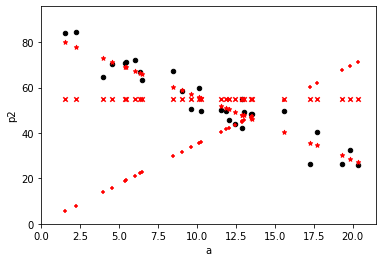

In [46]:
ax = df.plot.scatter(x = 'a', y = 'b', color = 'black')
ax = df.plot.scatter(x = 'a', y = 'p0', color = 'red', marker = 'x', ax = ax)
ax = df.plot.scatter(x = 'a', y = 'p1', color = 'red', marker = '*', ax = ax)
ax = df.plot.scatter(x = 'a', y = 'p2', color = 'red', marker = '+', ax = ax)
ax.set_xlim(0)
ax.set_ylim(0)

In [48]:
df.head()

,a,b,p0,p1,p2
0,20.345631,26.103490,55.163052,27.200550,71.172117
1,12.902236,54.846506,55.163052,48.081692,45.133986
2,12.880254,42.384390,55.163052,48.143357,45.057091
3,6.047069,71.957948,55.163052,67.312662,21.153567
4,12.474079,44.180867,55.163052,49.282811,43.636227


In [51]:
rows = [[0,3],[4,0],]
points = pd.DataFrame(rows, columns = ['pt1', 'pt2'], index = ['x', 'y'])
points

,pt1,pt2
x,0,3
y,4,0


In [53]:
dist = ((points.at['x','pt1']-points.at['x','pt2'])**2+(points.at['y','pt1']-points.at['y','pt2'])**2)**0.5
dist

5.0

In [55]:
rows = [[0,3],[4,0],[10,3],]
points = pd.DataFrame(rows, columns = ['pt1', 'pt2'], index = ['x', 'y', 'z'])
points

,pt1,pt2
x,0,3
y,4,0
z,10,3


In [56]:
dist = ((points.at['x','pt1']-points.at['x','pt2'])**2+(points.at['y','pt1']-points.at['y','pt2'])**2+(points.at['z','pt1']-points.at['z','pt2'])**2)**0.5
dist

8.602325267042627

In [61]:
((points['pt2']-points['pt1'])**2).sum()**0.5

8.602325267042627

In [62]:
df

,a,b,p0,p1,p2
0,20.345631,26.103490,55.163052,27.200550,71.172117
1,12.902236,54.846506,55.163052,48.081692,45.133986
2,12.880254,42.384390,55.163052,48.143357,45.057091
3,6.047069,71.957948,55.163052,67.312662,21.153567
4,12.474079,44.180867,55.163052,49.282811,43.636227
5,2.279876,84.423460,55.163052,77.880861,7.975354
6,13.549187,48.565955,55.163052,46.266783,47.397120
7,19.311780,26.293210,55.163052,30.100837,67.555550
8,11.875618,49.809929,55.163052,50.961689,41.542719
9,1.569455,83.833609,55.163052,79.873821,5.490194


In [63]:
((df['b']-df['p0'])**2).sum()**0.5

89.66543557036464

In [64]:
((df['b']-df['p1'])**2).sum()**0.5

26.630538866765754

In [65]:
((df['b']-df['p2'])**2).sum()**0.5

219.97987723076216

In [68]:
mse = ((df['b']-df['p1'])**2).mean()
mse

23.63952001114405

In [69]:
def euclidean_dist(df, col1, col2):
    return ((df[col1]-df[col2])**2).sum()**0.5

def mean_squared_error(df, col1, col2):
    return (euclidean_dist(df, col1, col2) ** 2) / len(df)

In [71]:
edist = ((df["b"] - df["p1"]) ** 2).sum() ** 0.5
edist

26.630538866765754

In [74]:
rows = [['M. Dupé', 1, 25, 'Right', 8.0, 900.0],
       ['N. Fernández', 26, 18, 'Right', 1.0, 450.0],
       ['P. Kalambayi', 30, 18, 'Right', 1.0, 130.0],
       ['P. McNair', 17, 23, 'Right', 22.0, 2300.0],
       ['G. Bojanich', 23, 33, 'Right', 6.0, 425.0],
       ['A. Kofler', 31, 31, 'Right', 3.0, 325.0],
       ['N. Lavanchy', 14, 24, 'Right', 3.0, 600.0],
       ['O. Al Khalaf', 8, 21, 'Right', 3.0, 240.0],
       ['J. Sills', 21, 31, 'Right', 7.0, 600.0],
       ['B. Fox', 12, 20, 'Right', 1.0, 230.0],
       ['S. Smith', 9, 20, 'Left', 4.0, 450.0],
       ['E. Ocansey', 28, 20, 'Left', 5.0, 1600.0],
       ['F. Kostić', 10, 25, 'Left', 16.0, 10500.0],
       ['M. Ullmann', 13, 22, 'Left', 3.0, 1000.0],
       ['R. Taylor', 9, 30, 'Left', 4.0, 625.0],
       ['N. Vikonis', 34, 34, 'Left', 7.0, 2700.0],
       ['J. Aguirre', 29, 21, 'Left', 1.0, 575.0],
       ['J. Konings', 25, 20, 'Left', 1.0, 500.0],
       ['J. Raitala', 22, 29, 'Left', 3.0, 700.0],
       ['A. Taylor', 3, 31, 'Left', 3.0, 425.0]]
df = pd.DataFrame.from_records(rows, columns=["Name", "JerseyNumber", "Age", "PreferredFoot", "Wage", "Value"])
df.dtypes
df["PreferredFootInt"] = (df["PreferredFoot"] == "Right").astype(int)

df["p"] = r.predict(df[columns])

print("euclidean dist:", euclidean_dist(df, "Value", "p"))
print("MSE:", mean_squared_error(df, "Value", "p"))

df

euclidean dist: 6791.905876854667
MSE: 2306499.2720026486


,Name,JerseyNumber,Age,PreferredFoot,Wage,Value,PreferredFootInt,p
0,M. Dupé,1,25,Right,8.0,900.0,1,1265.319992
1,N. Fernández,26,18,Right,1.0,450.0,1,-452.498445
2,P. Kalambayi,30,18,Right,1.0,130.0,1,-436.446758
3,P. McNair,17,23,Right,22.0,2300.0,1,5516.608000
4,G. Bojanich,23,33,Right,6.0,425.0,1,489.886350
5,A. Kofler,31,31,Right,3.0,325.0,1,-291.638661
6,N. Lavanchy,14,24,Right,3.0,600.0,1,-118.884084
7,O. Al Khalaf,8,21,Right,3.0,240.0,1,-39.686937
8,J. Sills,21,31,Right,7.0,600.0,1,844.869683
9,B. Fox,12,20,Right,1.0,230.0,1,-577.529138
